# CMS GIWAXS plotting notebook - plotting single images from loaded zarr datasets
# A1-3 Sample Set

## Imports

In [2]:
# Imports:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr
from tqdm.auto import tqdm

# Choose a colormap:
cmap = plt.cm.turbo
cmap.set_bad('black')

## Define & check paths

In [3]:
# I like pathlib for its readability & checkability, it's also necessary for the loadSeries function later on
# Replace the paths with the ones relevant to your data, you can use the ".exists()" method to make sure you defined a path correctly
propPath = pathlib.Path('/nsls2/data/cms/proposals/2023-2/pass-311415')  # The proposals path is a good place to store large data (>1 TB space?)
outPath = propPath.joinpath('AL_processed_data')

samplesPath = outPath.joinpath('ex_situ_zarrs')

## Single image GIWAXS plotting

In [4]:
# List the files inside a folder
sorted([f.name for f in samplesPath.iterdir()])  # a way to list just the filenames and not the whole path

['.ipynb_checkpoints',
 'caked_A1-3set-take2_waxs_stitched.zarr',
 'caked_A1-3set_waxs_stitched.zarr',
 'caked_PM6-Y6_waxs_stitched.zarr',
 'caked_PM6-Y6set_stitched.zarr',
 'caked_bladecoated_films_waxs_stitched.zarr',
 'raw_A1-3set-take2_waxs_stitched.zarr',
 'raw_A1-3set_waxs_stitched.zarr',
 'raw_PM6-Y6_waxs_stitched.zarr',
 'raw_PM6-Y6set_stitched.zarr',
 'raw_bladecoated_films_waxs_stitched.zarr',
 'recip_A1-3set-take2_waxs_stitched.zarr',
 'recip_A1-3set_waxs_stitched.zarr',
 'recip_PM6-Y6_waxs_stitched.zarr',
 'recip_PM6-Y6set_stitched.zarr',
 'recip_bladecoated_films_waxs_stitched.zarr']

### 2D plots

#### Caked Images

In [5]:
filename = 'caked_A1-3set-take2_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>1e-5)
DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116581  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116582  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116586  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116587  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116588  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    ...       ...
    1116628  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116629  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116630  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116634  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116635  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116636  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>

In [9]:
# How one could apply a sin chi correction
sin_chi_DA = np.sin(np.radians(np.abs(DS.chi)))
# sin_chi_DA

corr_DS = DS.copy()
for var in corr_DS.data_vars:
    corrected = corr_DS[var] * sin_chi_DA
    corr_DS[var].values = corrected.values
    
corr_DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116581  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116582  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116586  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116587  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116588  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    1116628  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116629  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116630  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116634  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116635  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116636  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [10]:
# A way to select dataarrays based on attribute values:
selected_DAs = [da for da in DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.120']
len(selected_DAs)

10

  0%|          | 0/10 [00:00<?, ?it/s]

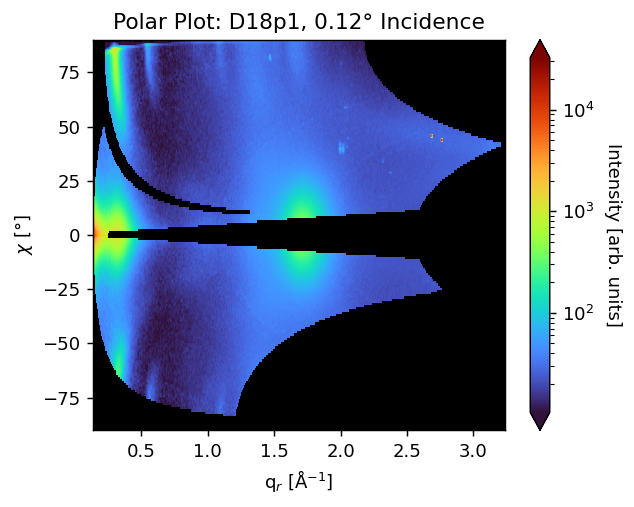

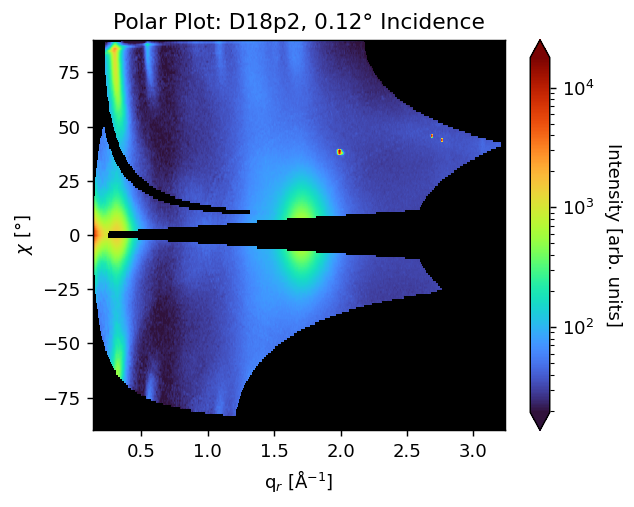

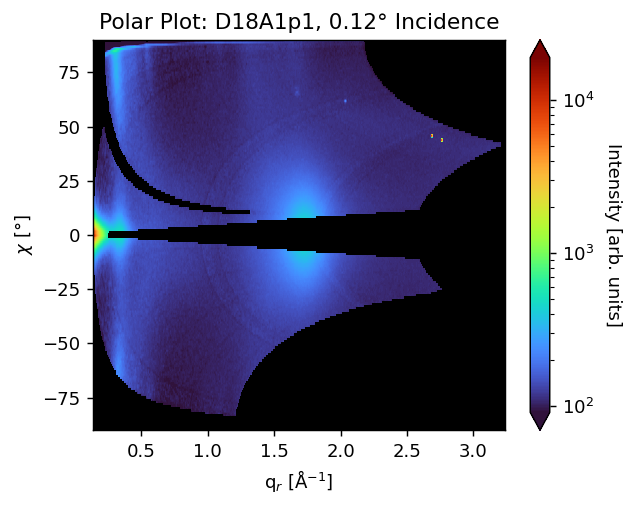

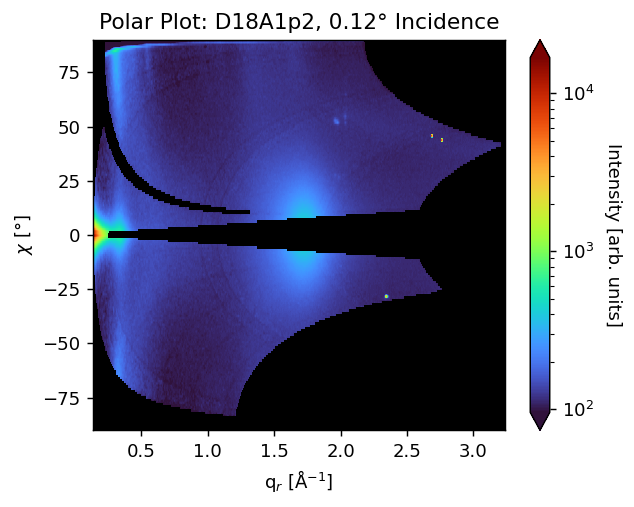

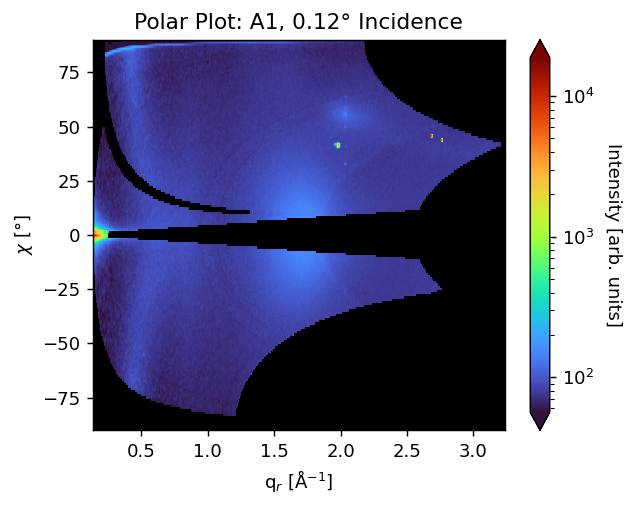

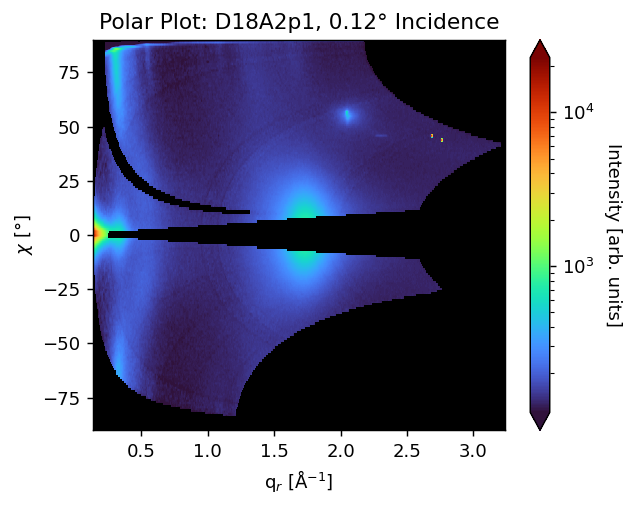

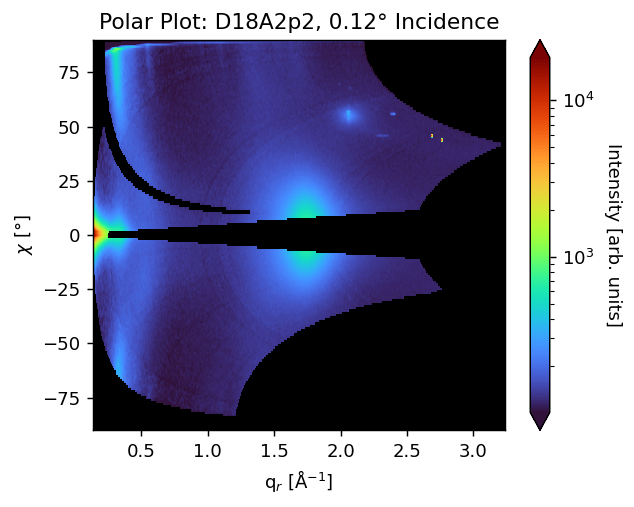

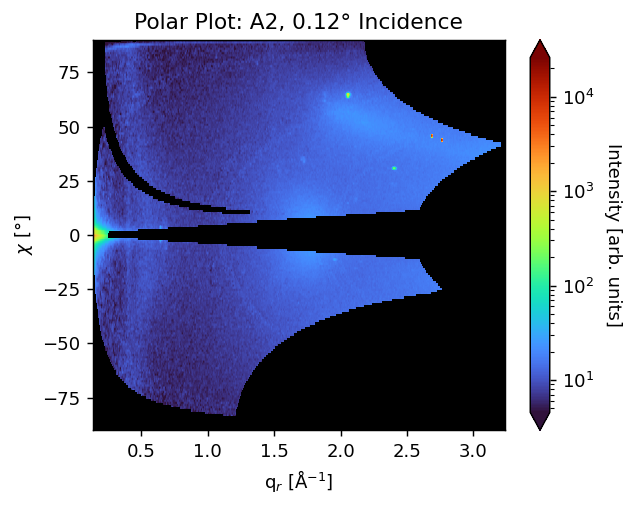

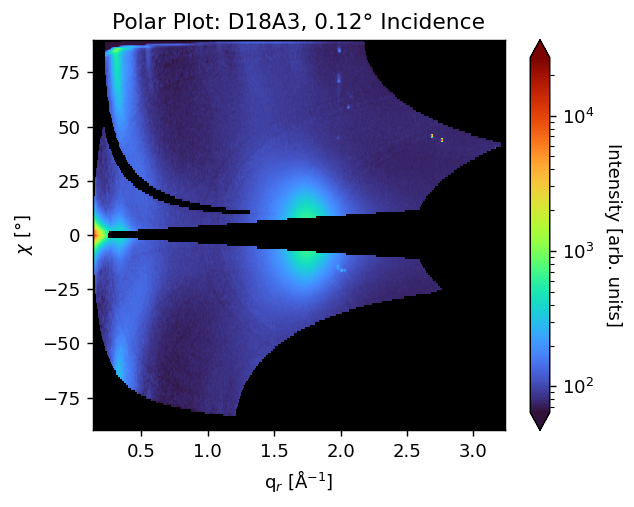

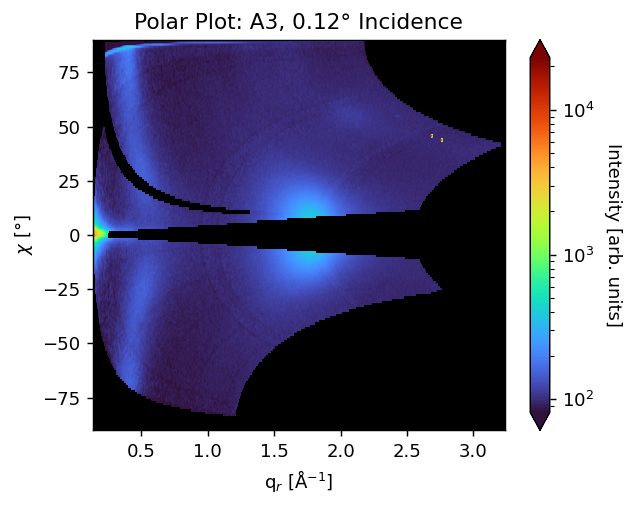

In [11]:
# Plot and optionally save selected dataarrays:
# Set chi range: Full range
chi_min = -90
chi_max = 90

for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max))
    cmin = float(sliced_DA.compute().quantile(1e-2))  # Set color minimum value, based on quantile 
    cmax = float(sliced_DA.compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4), interpolation='antialiased')  # plot, optional parameter interpolation='antialiased' for image smoothing
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'polar-2D_{DA.sample_id}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

  0%|          | 0/10 [00:00<?, ?it/s]

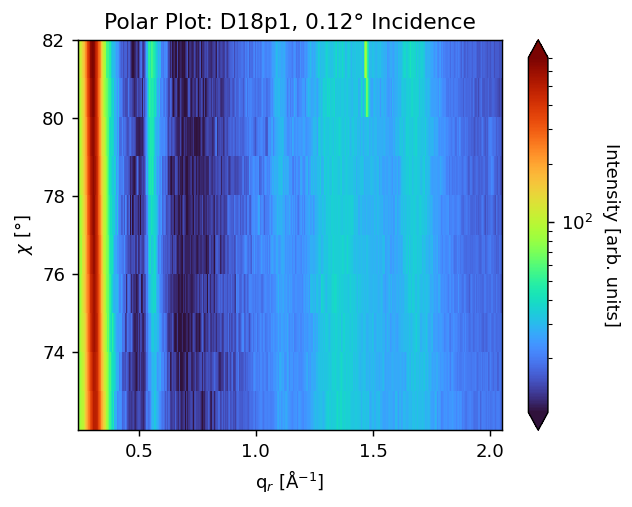

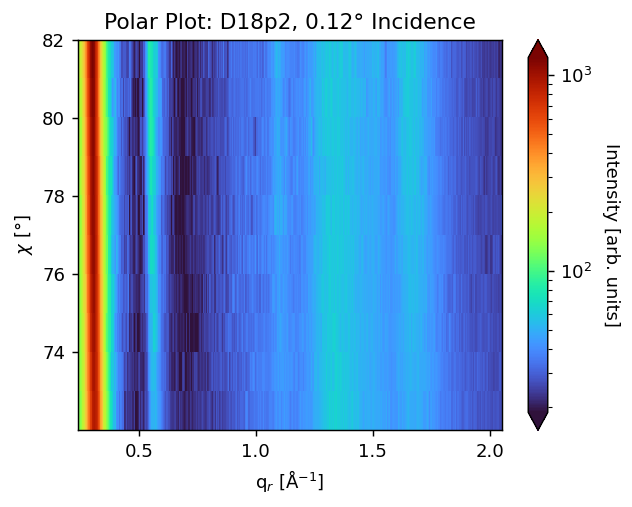

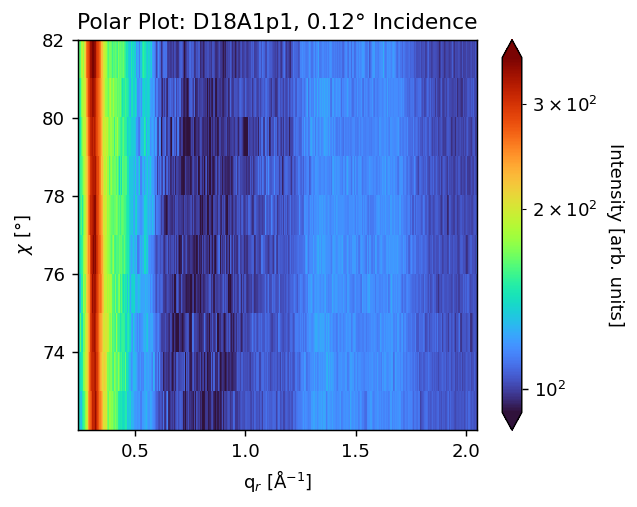

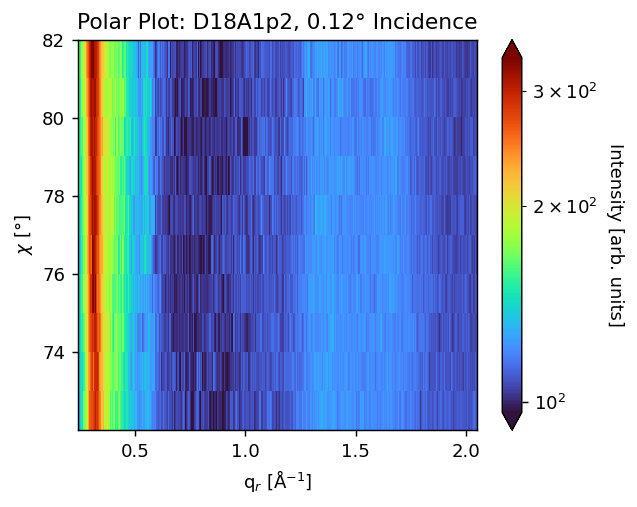

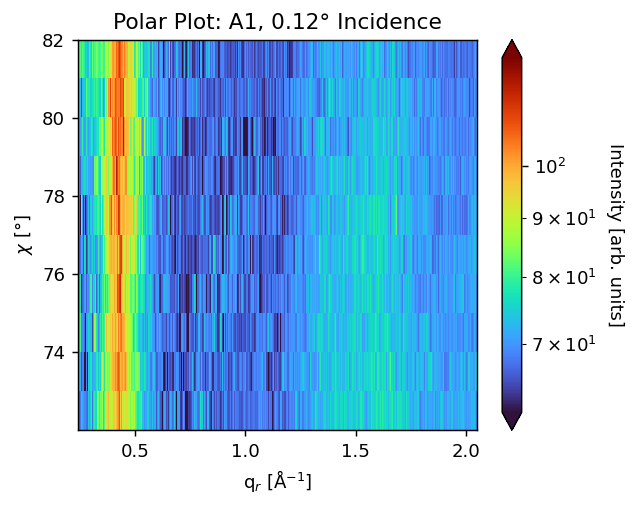

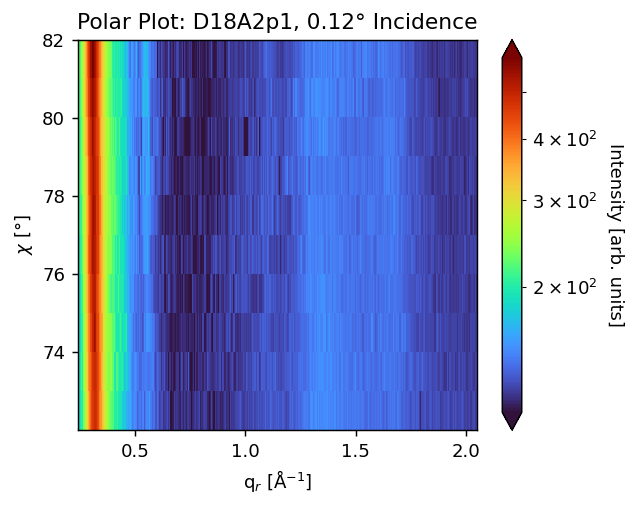

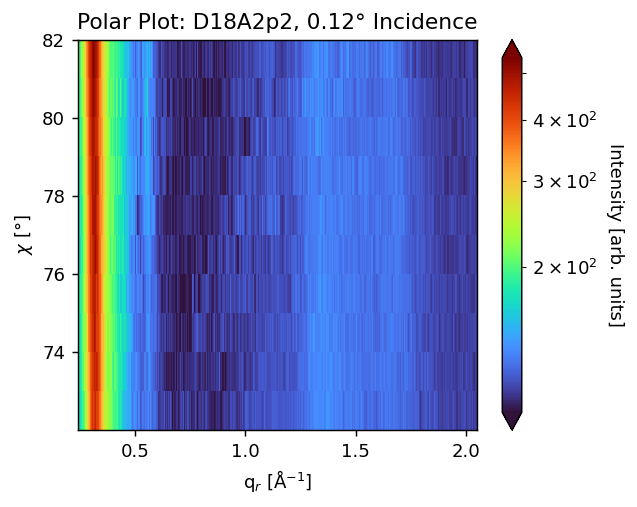

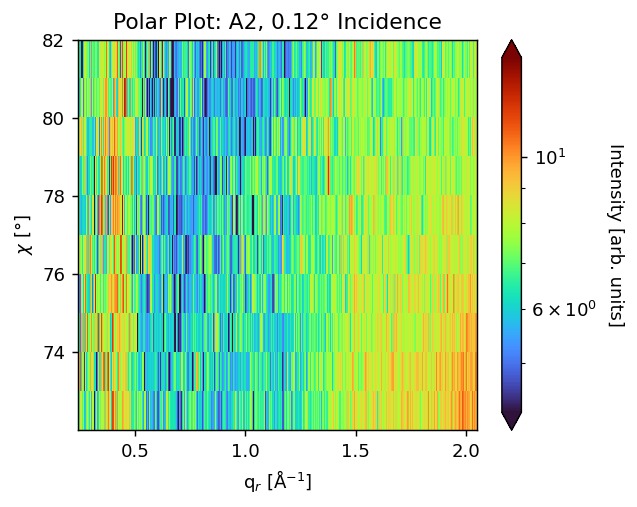

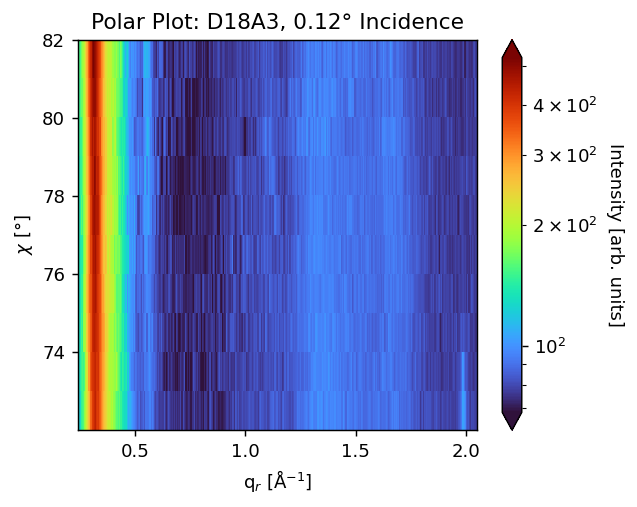

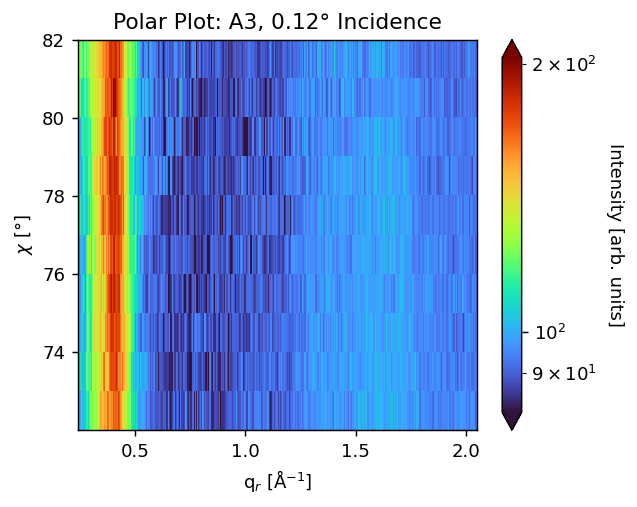

In [17]:
# Plot and optionally save selected dataarrays:
# Set chi range: In plane slice, choose a smooth section without detector gap/edge effects
chi_min = 72
chi_max = 82

for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max), qr=slice(0.24,2.05))
    cmin = float(sliced_DA.compute().quantile(1e-2))  # Set color minimum value, based on quantile 
    cmax = float(sliced_DA.compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4))  # plot
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'polar-2D_{DA.sample_id}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

  0%|          | 0/10 [00:00<?, ?it/s]

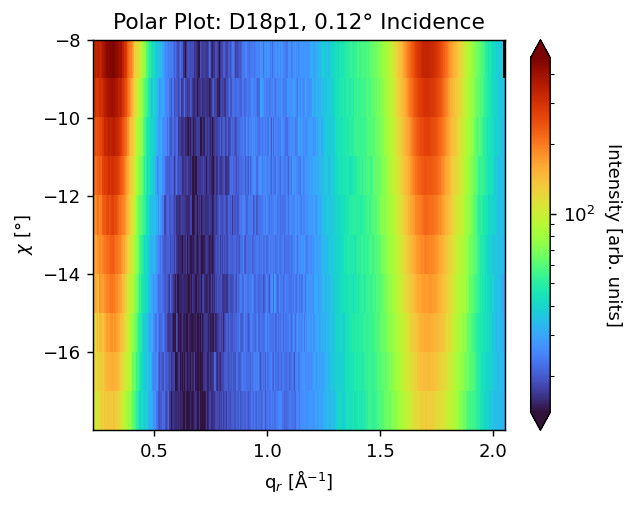

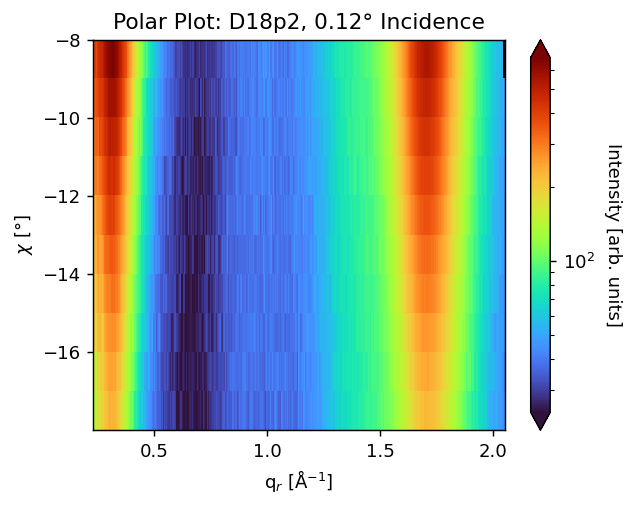

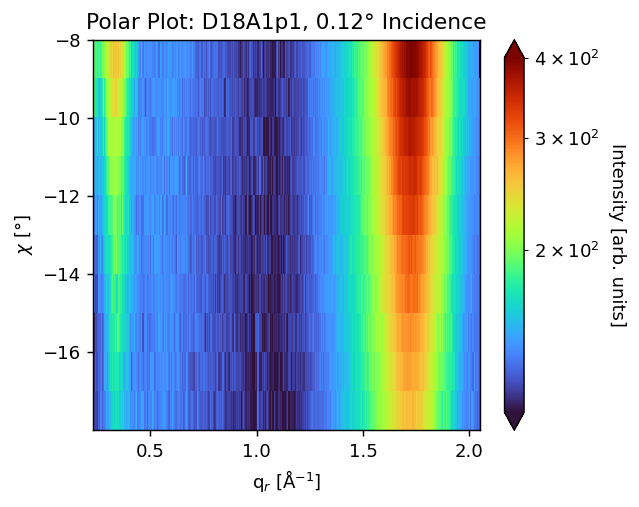

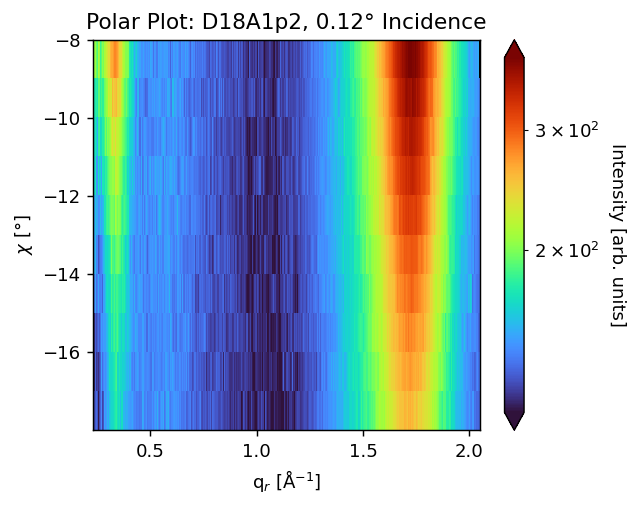

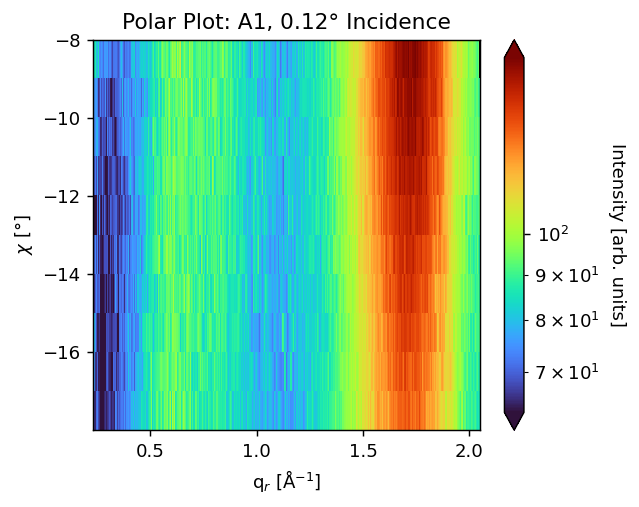

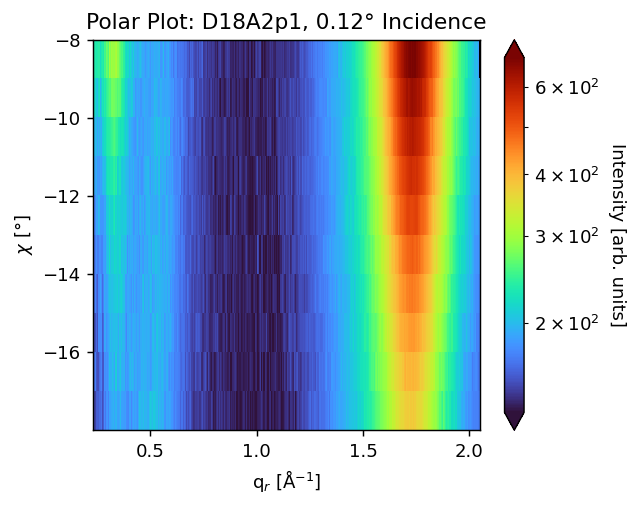

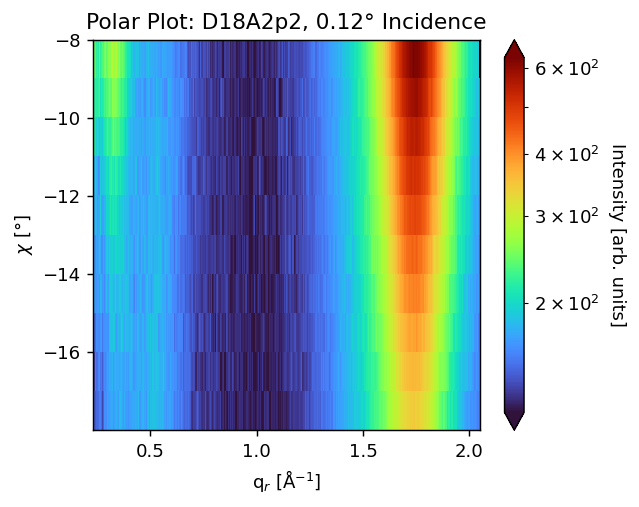

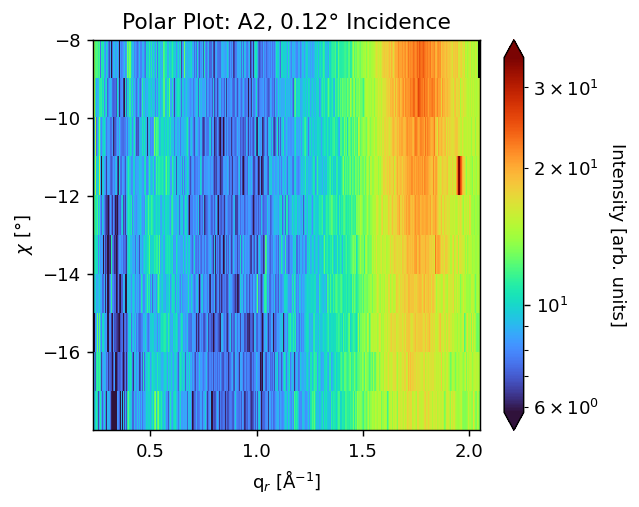

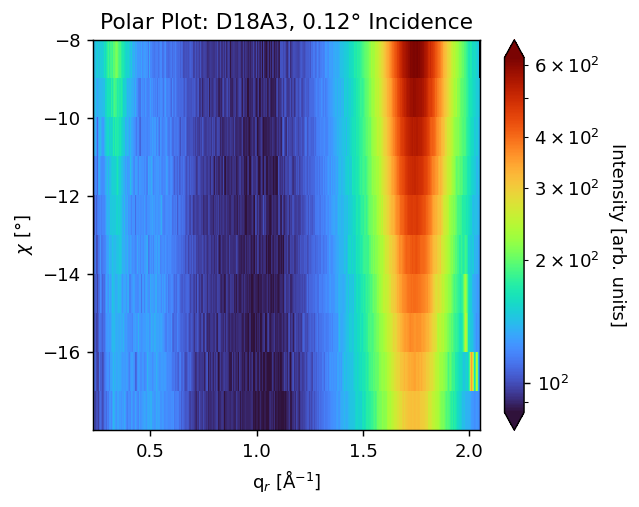

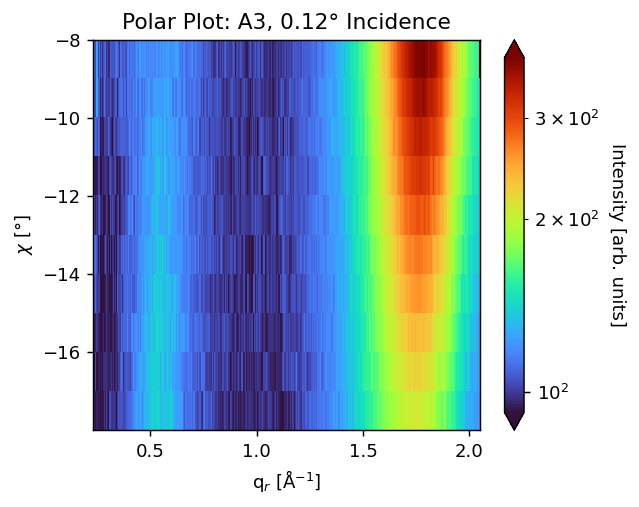

In [14]:
# Plot and optionally save selected dataarrays:
# Set chi range: In plane slice, choose a smooth section without detector gap/edge effects
chi_min = -18
chi_max = -8

for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max), qr=slice(0.23,2.05))
    cmin = float(sliced_DA.compute().quantile(1e-2))  # Set color minimum value, based on quantile 
    cmax = float(sliced_DA.compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4))  # plot
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'polar-2D_{DA.sample_id}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

In [9]:
# # A way to save data as csv files  
# for DA in DS.data_vars.values():
#     # qr columns, chi rows
#     DA.to_pandas().to_csv(outPath.joinpath('PM6-Y6_waxs', f'polar-2D_{DA.polymer}-{DA.weight_percent}_{DA.incident_angle}_{DA.scan_id}.csv'))

#### Reciprocal Space Images

In [80]:
[f.name for f in samplesPath.iterdir()]

['raw_bladecoated_films_waxs_stitched.zarr',
 'caked_A1-3set_waxs_stitched.zarr',
 'raw_A1-3set-take2_waxs_stitched.zarr',
 'raw_PM6-Y6_waxs_stitched.zarr',
 'caked_PM6-Y6set_stitched.zarr',
 'caked_PM6-Y6_waxs_stitched.zarr',
 'raw_PM6-Y6set_stitched.zarr',
 'raw_A1-3set_waxs_stitched.zarr',
 'recip_PM6-Y6_waxs_stitched.zarr',
 'recip_PM6-Y6set_stitched.zarr',
 'caked_bladecoated_films_waxs_stitched.zarr',
 'caked_A1-3set-take2_waxs_stitched.zarr',
 'recip_bladecoated_films_waxs_stitched.zarr',
 'recip_A1-3set_waxs_stitched.zarr',
 'recip_A1-3set-take2_waxs_stitched.zarr']

In [84]:
filename = 'recip_A1-3set-take2_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>0)
DS

<xarray.Dataset>
Dimensions:  (q_z: 1043, q_xy: 981)
Coordinates:
  * q_xy     (q_xy) float64 -1.219 -1.215 -1.212 -1.209 ... 2.171 2.175 2.178
  * q_z      (q_z) float64 0.007275 0.009704 0.01213 ... 2.534 2.537 2.539
Data variables: (12/30)
    1116580  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116581  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116582  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116586  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116587  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116588  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    ...       ...
    1116628  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116629  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116630  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116634  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116635  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116636  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>

In [85]:
selected_DAs = [da for da in DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.120']
len(selected_DAs)

10

  0%|          | 0/10 [00:00<?, ?it/s]

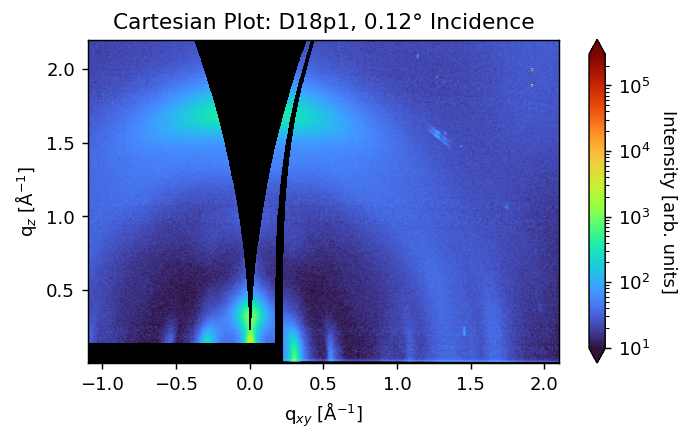

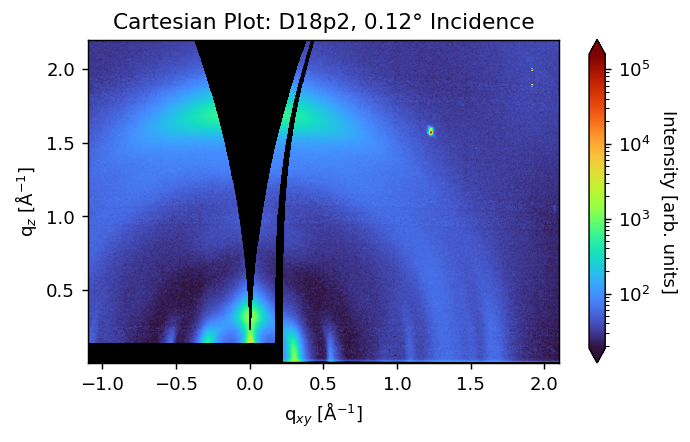

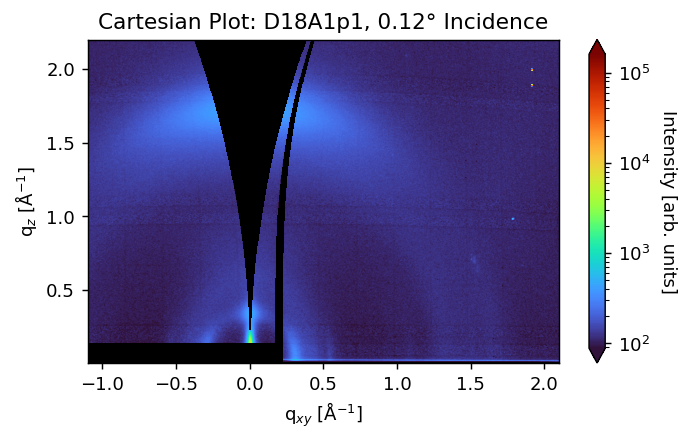

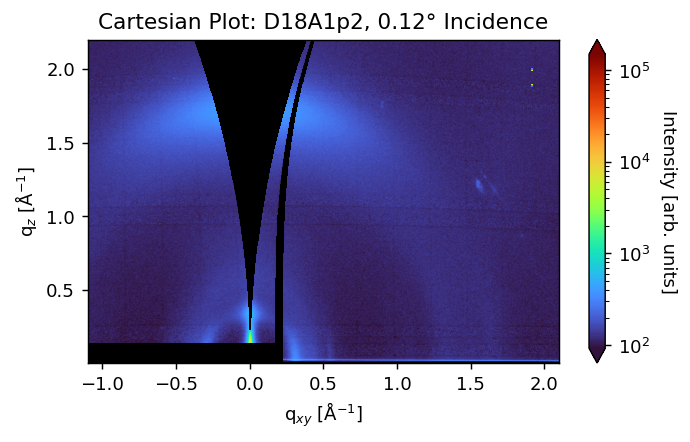

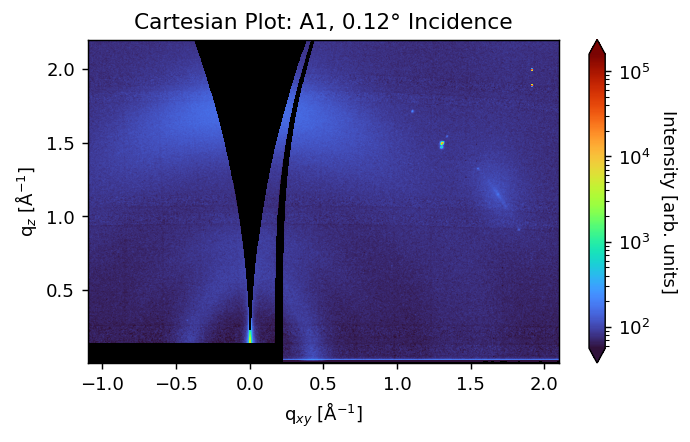

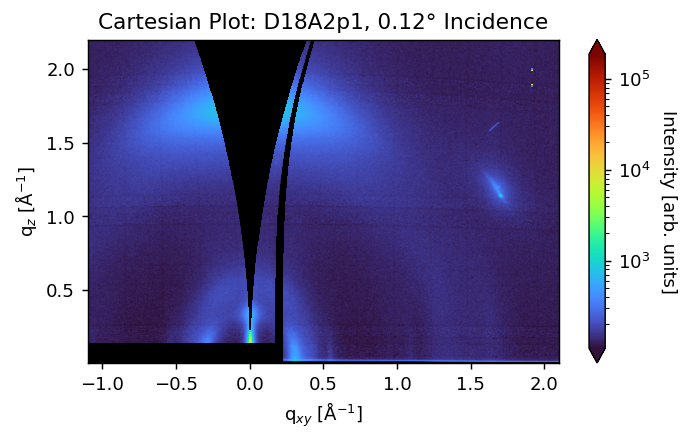

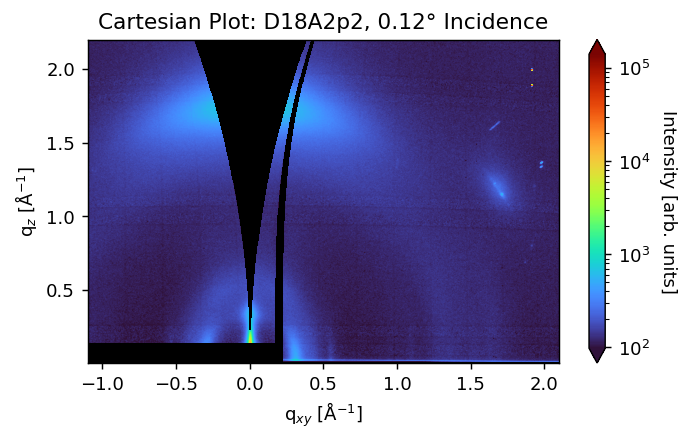

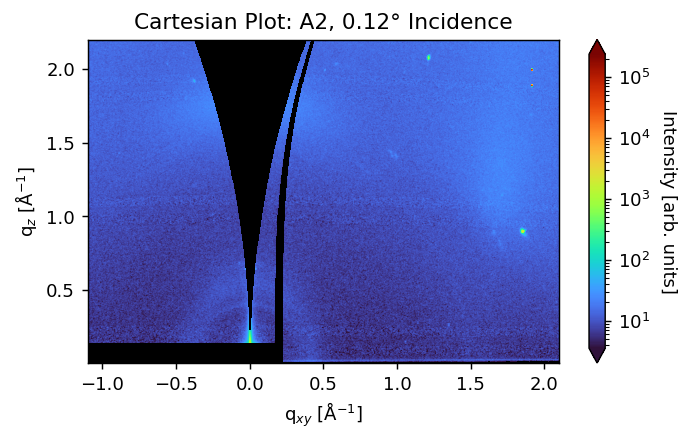

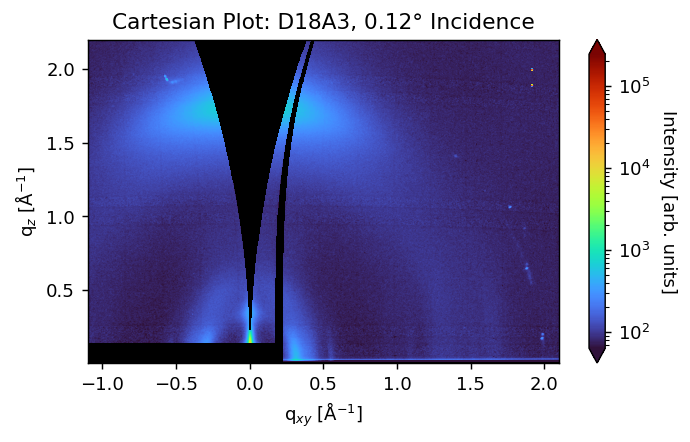

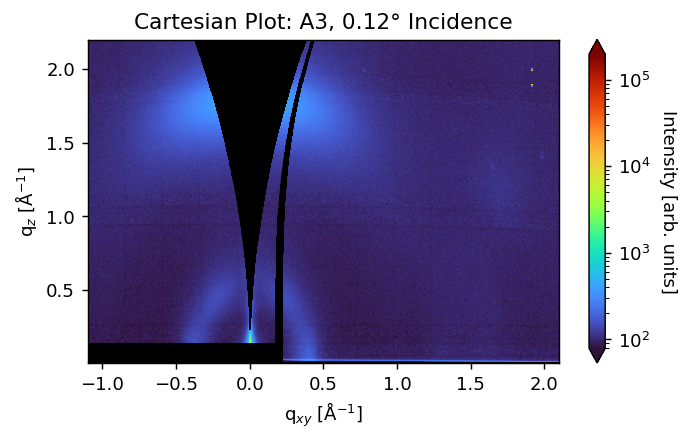

In [86]:
# Plot & optionally save each selected polymer:-{DA.weight_percent}
for DA in tqdm(selected_DAs):
    # Slice data for selected q ranges (will need to rename q_xy if dimensions are differently named)
    sliced_DA = DA.sel(q_xy=slice(-1.1, 2.1), q_z=slice(0, 2.2))
    cmin = float(sliced_DA.compute().quantile(1e-2))
    cmax = float(sliced_DA.compute().quantile(1-1e-8))   
    
    # Same plotting procedure as above
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), interpolation='antialiased', figsize=(5.5,3.3))
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)
    ax.axes.set(aspect='equal', title=f'Cartesian Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_{xy}$ [Å$^{-1}$]', ylabel='q$_z$ [Å$^{-1}$]')
    ax.figure.set(tight_layout=True, dpi=130)
    
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'cartesian-2D_{DA.sample_id}_{DA.incident_angle}.png'), dpi=150)
    plt.show()
    plt.close('all')

In [13]:
# # A way to save data as csv files
# for DA in tqdm(DS.data_vars.values()):
#     # qxy columns, qz rows
#     DA.to_pandas().to_csv(outPath.joinpath('PM6-Y6_waxs', f'cartesian-2D_{DA.polymer}-{DA.weight_percent}_{DA.incident_angle}_{DA.scan_id}.csv'))

### 1D Plots

In [6]:
filename = 'caked_A1-3set-take2_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>1e-5)
DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116581  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116582  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116586  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116587  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116588  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    ...       ...
    1116628  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116629  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116630  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116634  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116635  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116636  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>

In [7]:
selected_DAs = [da for da in DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.120']
len(selected_DAs)

10

In [20]:
outPath

PosixPath('/nsls2/data/cms/proposals/2023-2/pass-311415/AL_processed_data')

In [8]:
# fpath = outPath.joinpath('PM6-Y6set_waxs', f'linecut_IP_{DA.polymer}-{DA.weight_percent}_{chi_min}to{chi_max}chi_{DA.incident_angle}.csv')
# OOP_linecut_DA.to_dataframe('OOP Intensity').to_csv(fpath)

  0%|          | 0/10 [00:00<?, ?it/s]

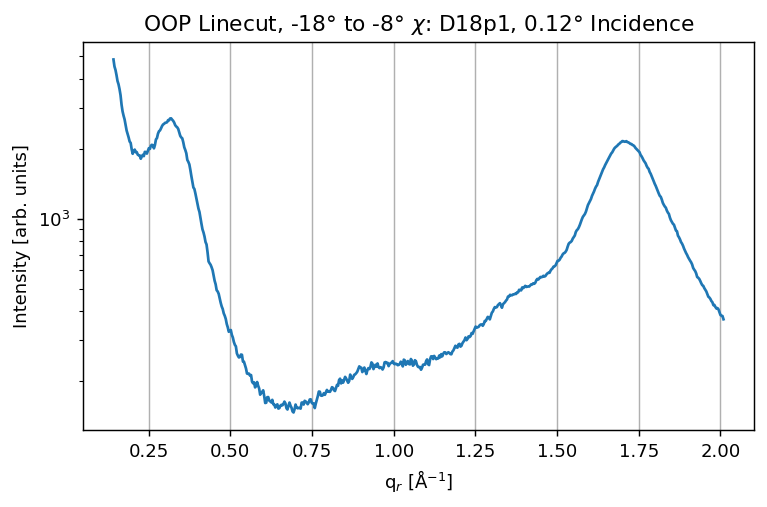

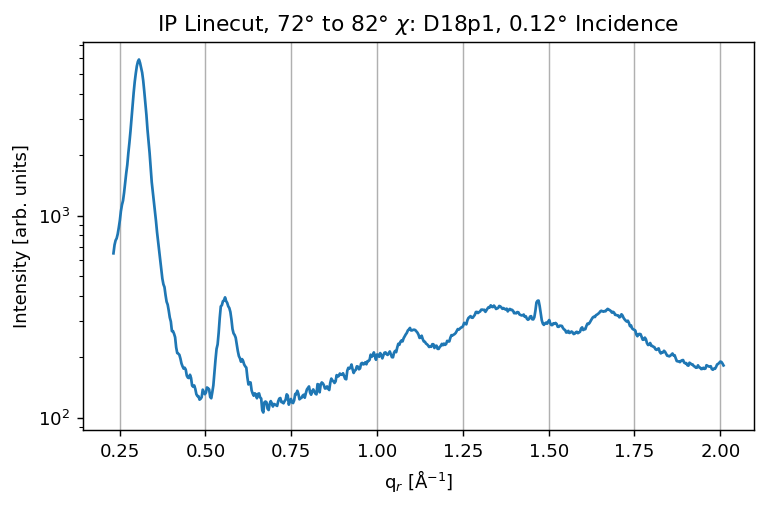

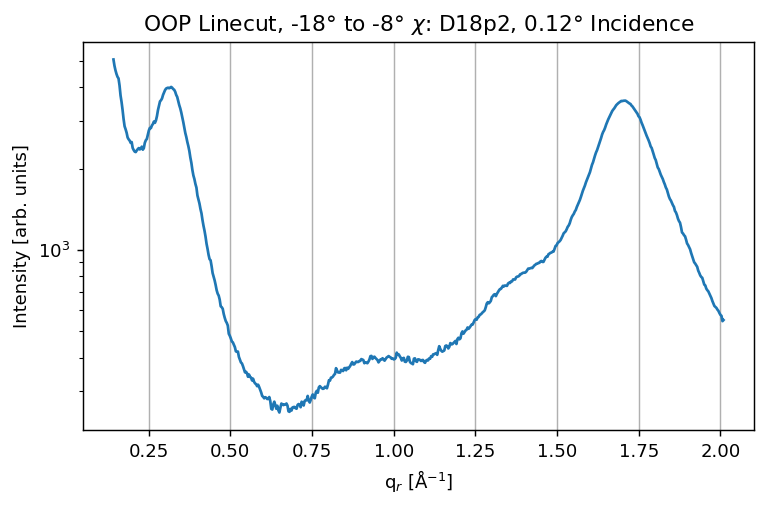

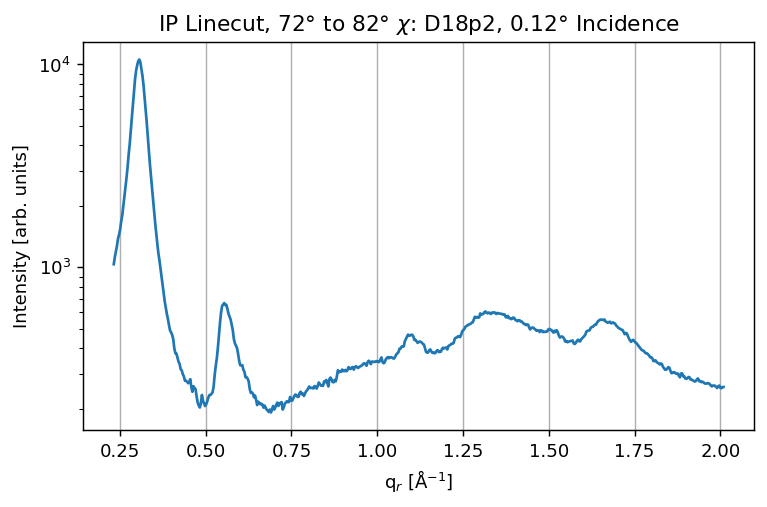

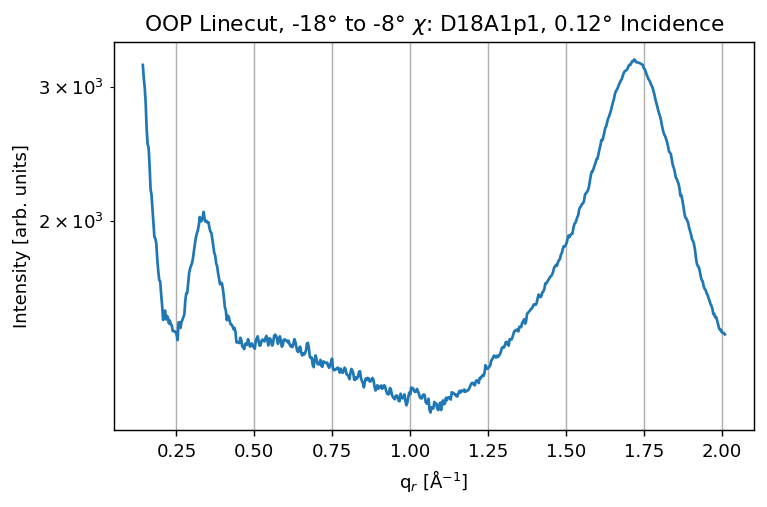

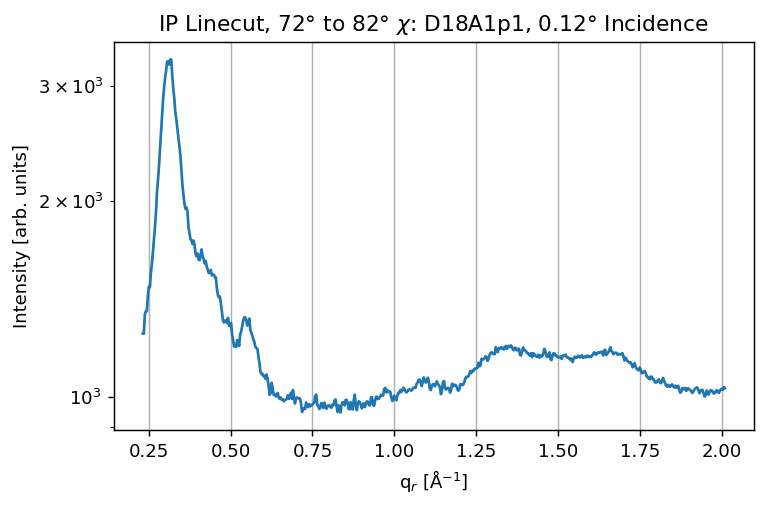

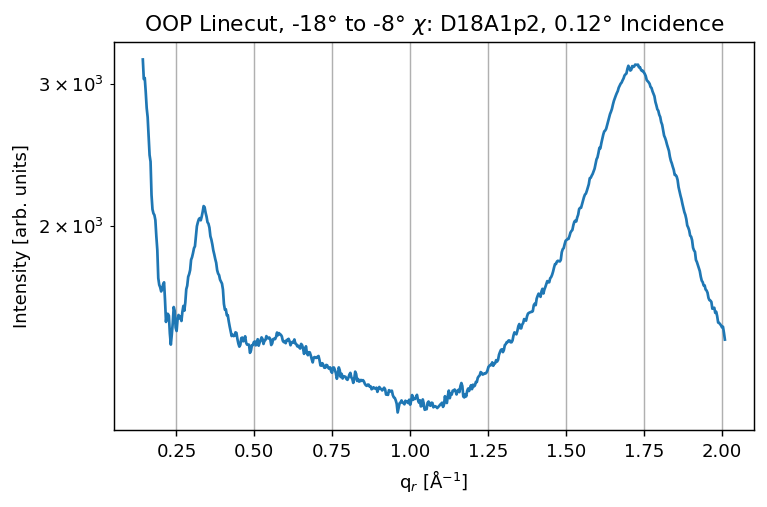

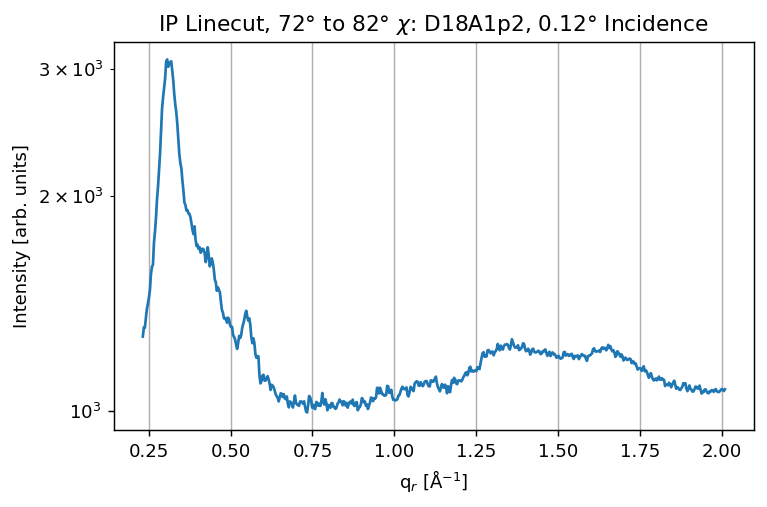

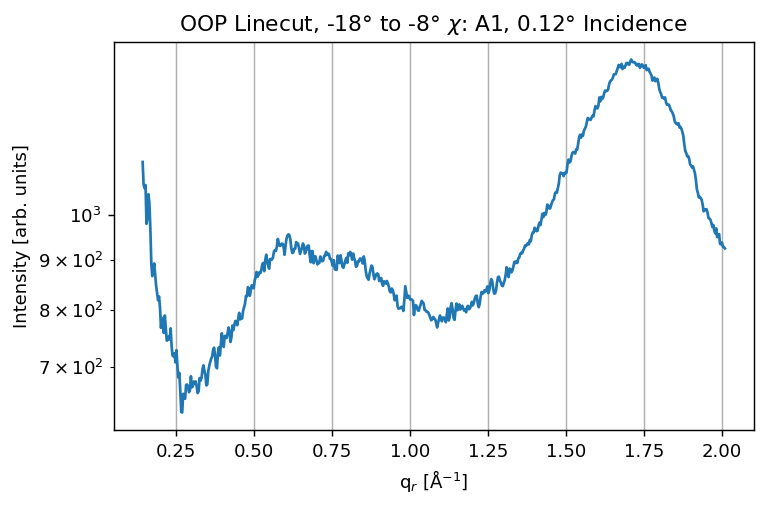

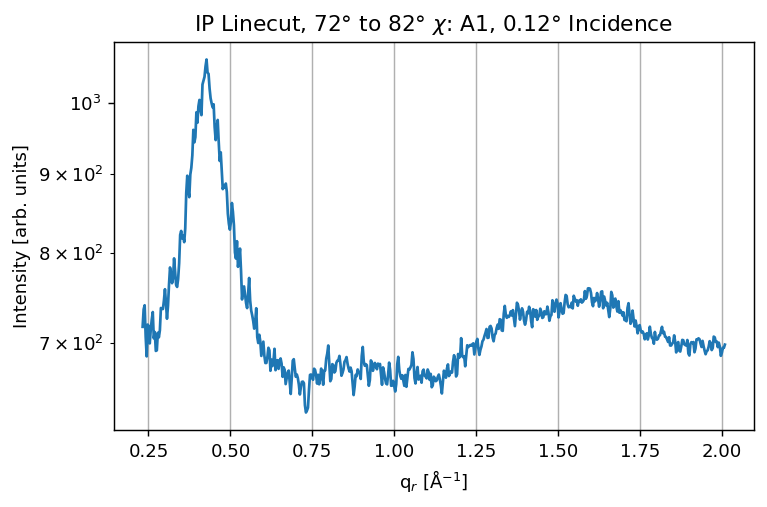

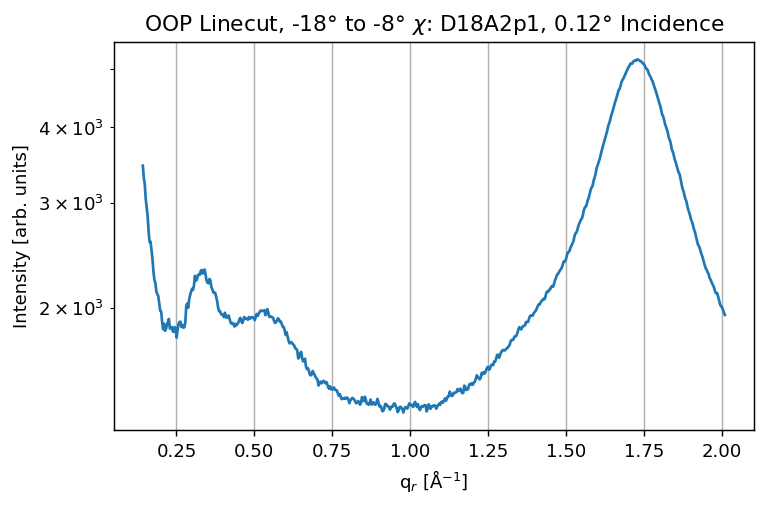

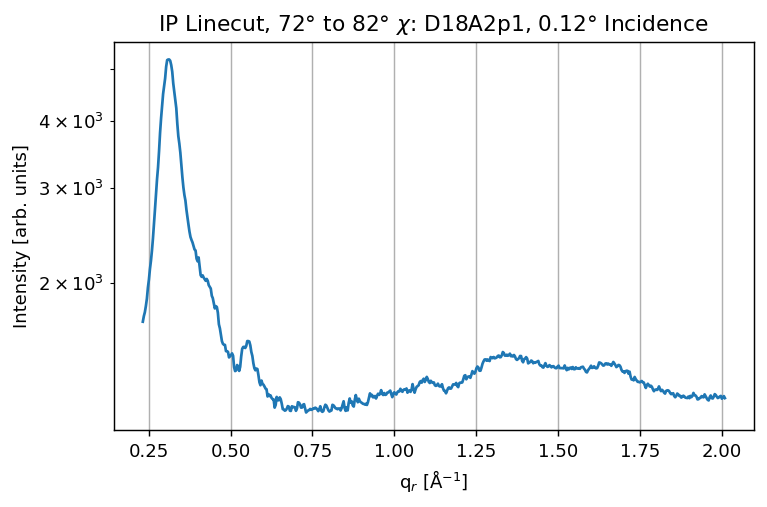

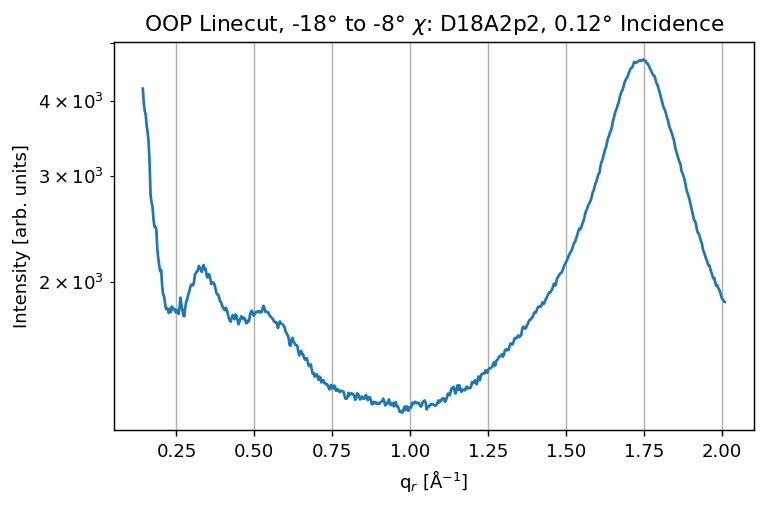

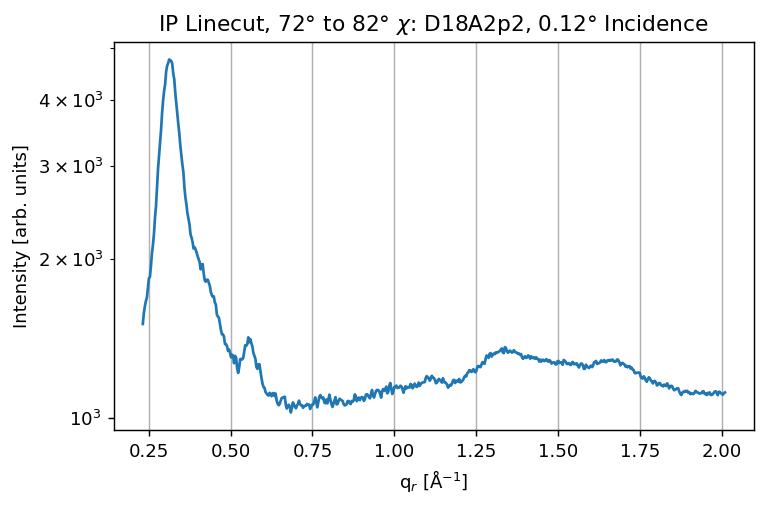

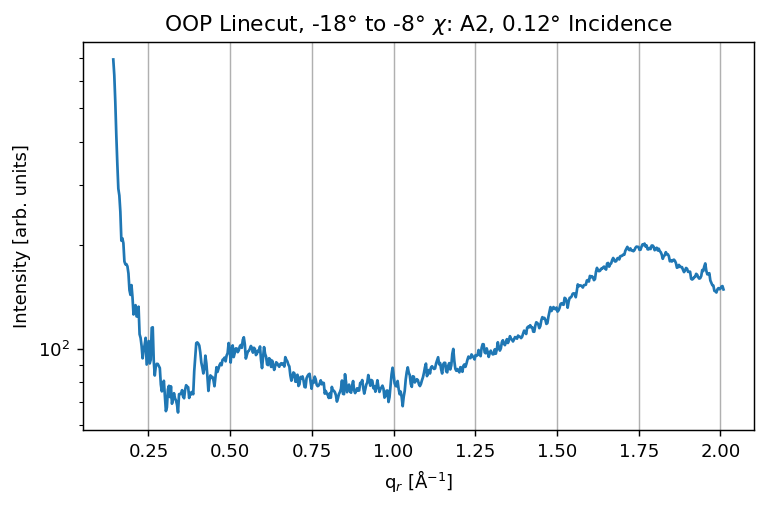

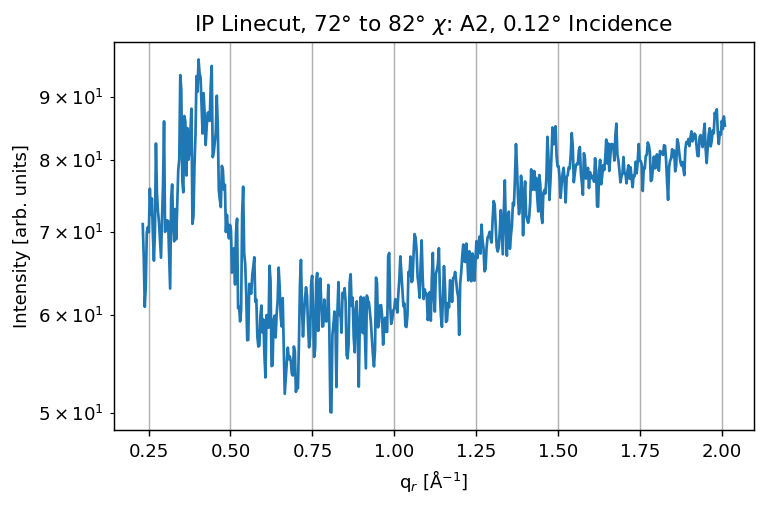

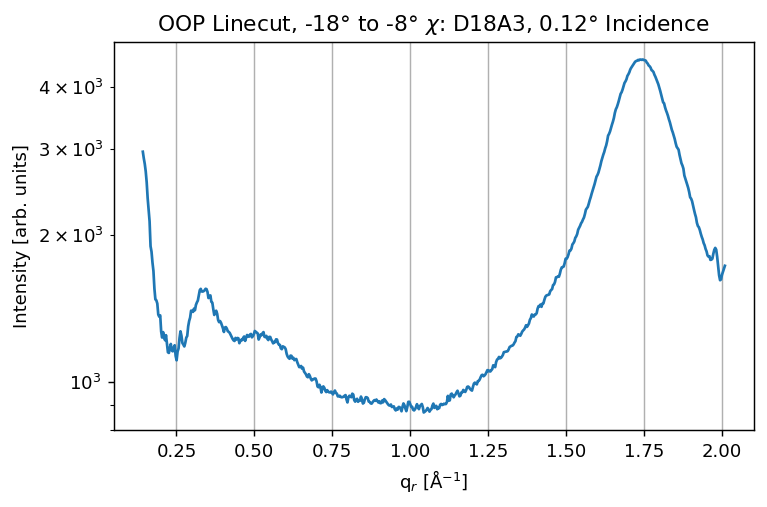

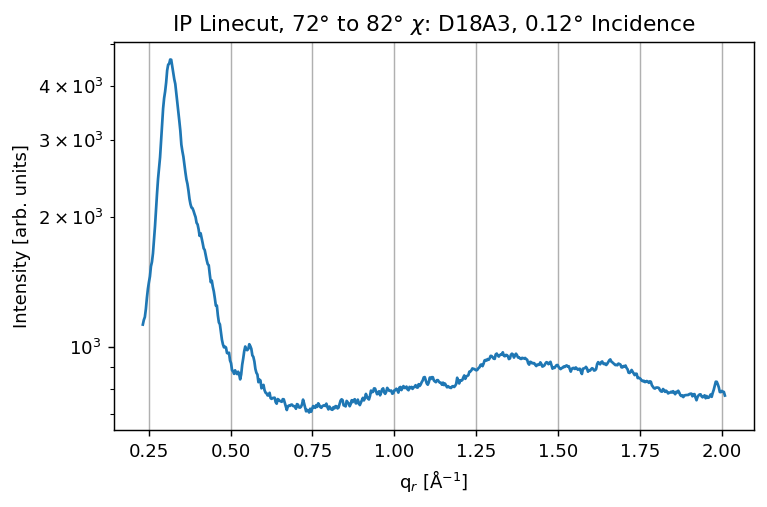

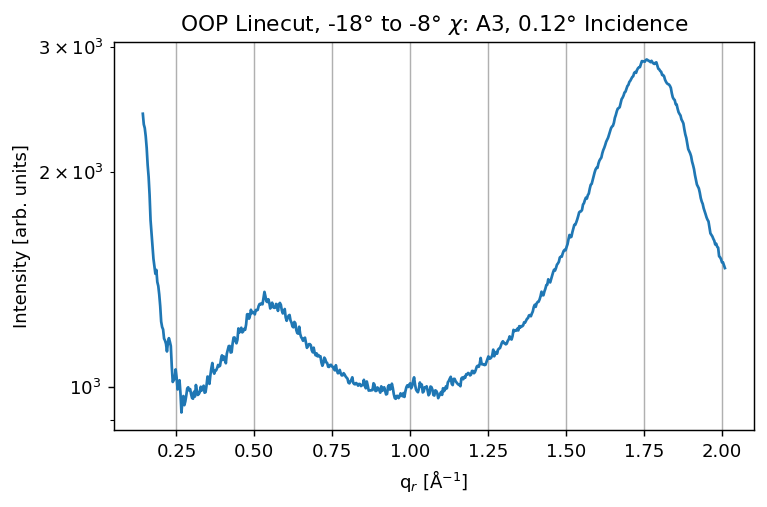

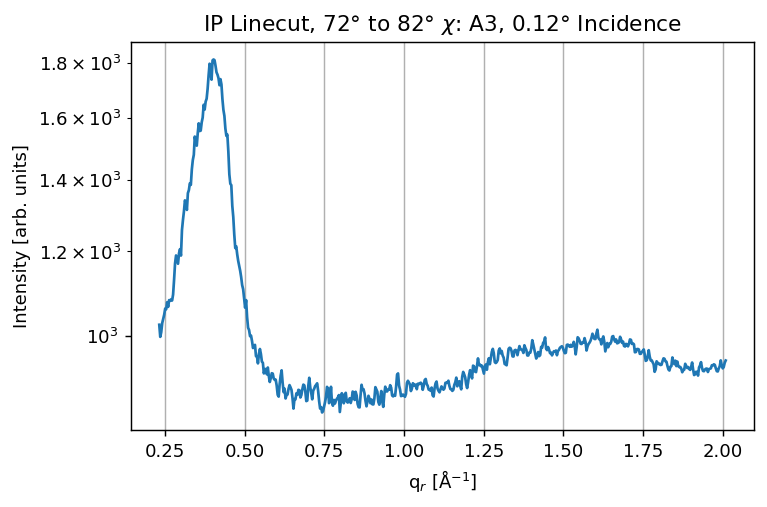

In [21]:
# Plot linecuts for selected chi ranges, here I've put both in plane and out of plane selections into the loop

for DA in tqdm(selected_DAs):
    # OOP
    chi_min = -18
    chi_max = -8
    OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.14,2.01)).sum('chi')
    OOP_linecut_DA.plot.line(figsize=(6,4))

    # A plot.line xarray plot does not return an AxesImage object like imshow does, so I use plt.gca() and plt.gcf() to access the axes & figure parameters
    ax = plt.gca()
    fig = plt.gcf()
    
    ax.set(title=f'OOP Linecut, {chi_min}° to {chi_max}° $\chi$: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
           yscale='log', ylabel='Intensity [arb. units]', xlabel='q$_r$ [Å$^{-1}$]')
    ax.grid(visible=True, which='major', axis='x')
    fig.set(tight_layout=True, dpi=130)
    
    plt.show()
    # fpath = outPath.joinpath('A1-3set_waxs/linecuts', f'OOP_{DA.film}_{chi_min}to{chi_max}chi_{DA.incident_angle}.csv')
    # print('Saving csv data...')
    # OOP_linecut_DA.to_dataframe('OOP_Intensity').to_csv(fpath)
    # print('Saved!')
    fig.savefig(outPath.joinpath('A1-3set_waxs/linecuts', f'OOP_{DA.film}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')
    
    # IP
    chi_min = 72
    chi_max = 82
    IP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.23,2.01)).sum('chi')
    IP_linecut_DA.plot.line(figsize=(6,4))  
    
    ax = plt.gca()
    fig = plt.gcf()
    
    ax.set(title=f'IP Linecut, {chi_min}° to {chi_max}° $\chi$: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
           yscale='log', ylabel='Intensity [arb. units]', xlabel='q$_r$ [Å$^{-1}$]')
    ax.grid(visible=True, which='major', axis='x')
    fig.set(tight_layout=True, dpi=130)
    
    plt.show()
    # fpath = outPath.joinpath('PM6-Y6set_waxs', f'linecut_IP_{DA.polymer}-{DA.weight_percent}_{chi_min}to{chi_max}chi_{DA.incident_angle}.csv')
    # print('Saving csv data...')
    # IP_linecut_DA.to_dataframe('IP_Intensity').to_csv(fpath)  
    # print('Saved!')
    fig.savefig(outPath.joinpath('A1-3set_waxs/linecuts', f'IP_{DA.film}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')
    